In [1]:
import pandas as pd
confirmed_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
con = pd.read_csv(confirmed_url)
recover_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
rec = pd.read_csv(recover_url)
death_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
dea = pd.read_csv(death_url)

In [2]:
c=con[con['Country/Region']=='Japan'].to_numpy()
r=rec[rec['Country/Region']=='Japan'].to_numpy()
d=dea[dea['Country/Region']=='Japan'].to_numpy()

In [3]:
c,r,d

(array([[nan, 'Japan', 36.0, 138.0, 2, 2, 2, 2, 4, 4, 7, 7, 11, 15, 20,
         20, 20, 22, 22, 22, 25, 25, 26, 26, 26, 28, 28, 29, 43, 59, 66,
         74, 84, 94, 105, 122, 147, 159, 170, 189, 214, 228, 241, 256,
         274, 293, 331, 360, 420, 461, 502, 511, 581, 639, 639, 701, 773,
         839, 839, 878, 889, 924, 963, 1007, 1101, 1128, 1193, 1307, 1387,
         1468, 1693, 1866, 1866, 1953, 2178, 2495, 2617, 3139, 3139, 3654,
         3906, 4257, 4667, 5530, 6005, 6748, 7370, 7645, 8100, 8626, 9787,
         10296, 10797, 10797, 11135, 11512, 12368, 12829, 13231, 13441,
         14153]], dtype=object),
 array([[nan, 'Japan', 36.0, 138.0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 4, 9, 9, 9, 9, 12, 12, 12, 13, 18, 18, 22, 22,
         22, 22, 22, 22, 22, 22, 32, 32, 32, 43, 43, 43, 46, 76, 76, 76,
         101, 118, 118, 118, 118, 118, 144, 144, 144, 150, 191, 232, 235,
         235, 285, 310, 359, 372, 404, 424, 424, 424, 472, 472, 514, 514,
         5

In [4]:
import numpy as np
Stai=[]
for i in range(4,97):
    Stai.append(sum(c[:,i]))
Star=[]
for i in range(4,97):
    Star.append(sum(r[:,i]))
Stad=[]
for i in range(4,97):
    Stad.append(sum(d[:,i]))
Sta=[]
Sta.append(Stai)
Sta.append(Star)
Sta.append(Stad)
Data=np.mat(Sta)

In [5]:
Data

matrix([[    2,     2,     2,     2,     4,     4,     7,     7,    11,
            15,    20,    20,    20,    22,    22,    22,    25,    25,
            26,    26,    26,    28,    28,    29,    43,    59,    66,
            74,    84,    94,   105,   122,   147,   159,   170,   189,
           214,   228,   241,   256,   274,   293,   331,   360,   420,
           461,   502,   511,   581,   639,   639,   701,   773,   839,
           839,   878,   889,   924,   963,  1007,  1101,  1128,  1193,
          1307,  1387,  1468,  1693,  1866,  1866,  1953,  2178,  2495,
          2617,  3139,  3139,  3654,  3906,  4257,  4667,  5530,  6005,
          6748,  7370,  7645,  8100,  8626,  9787, 10296, 10797, 10797,
         11135, 11512, 12368],
        [    0,     0,     0,     0,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     4,     9,     9,     9,     9,    12,    12,    12,
            13,    18,    18,    

In [6]:
def FEuler(V,beta,alpha,r,miu,N0):
    return V+np.mat([[-beta*V[1,0]*V[0,0]/N0],[beta*V[1,0]*V[0,0]/N0-alpha*V[1,0]],[alpha*V[1,0]-(r+miu)*V[2,0]],[r*V[2,0]],[miu*V[2,0]]])
def DFEu(D,V,beta,alpha,r,miu,N0):
    return np.mat([[1-beta*V[1,0]/N0,-beta*V[0,0]/N0,0,0,0],[beta*V[1,0]/N0,1-alpha+beta*V[0,0]/N0,0,0,0],[0,alpha,1-r-miu,0,0],[0,0,r,1,0],[0,0,miu,0,1]])*D+np.mat([[-V[2,0]*V[0,0]/N0,0,0,0],[V[2,0]*V[0,0]/N0,-V[1,0],0,0],[0,V[1,0],-V[2,0],-V[2,0]],[0,0,V[2,0],0],[0,0,0,V[2,0]]])

In [7]:
def Jf(V,Data,T):
    S=0
    for i in range(T):
        S=S+np.multiply(V[2:,i]-Data[:,i+1],V[2:,i]-Data[:,i+1]).sum()
    return (S/T)**0.5
def DJ(V,D,Data,T,J):
    S=np.mat([0,0,0,0])
    for i in range(T):
        S=S+((V[2:,i]-Data[:,i+1]).T)*D[2:,:]
    S=S/(T*J)
    return S,(np.multiply(S,S).sum())**0.5

In [9]:
I0,R0,D0,N0=1,0,0,1.265*10**8
eta,epsi=0.001,0.01

In [23]:
k,E0=0,10
beta,alpha,r,miu=0.3,0.196,0.121,0.02
while k<10000:
    V=np.mat([[(N0-E0-I0-R0-D0)*(1-beta*E0/N0)],[(1-alpha)*E0+beta*E0*(N0-E0-I0-R0-D0)/N0],[alpha*E0-(r+miu)*I0],[r*I0],[miu*I0]])
    D=np.mat([[-(N0-E0-I0-R0-D0)*E0/N0,0,0,0],[E0*(N0-E0-I0-R0-D0)/N0,-E0,0,0],[0,E0,-I0,-I0],[0,0,I0,0],[0,0,0,I0]])
    T=90
    Vnew=V
    for i in range(1,T):
        D=DFEu(D,Vnew,beta,alpha,r,miu,N0)
        Vnew=FEuler(Vnew,beta,alpha,r,miu,N0)
        V=np.hstack((V,Vnew))
    J=Jf(V,Data,T)
    if k==0 or J<Jmin:
        Jmin=J
        b_,a_,r_,m_=beta,alpha,r,miu
        Vmin=V
    k=k+1
    dJ,mse=DJ(V,D,Data,T,J)
    dJ,mse=DJ(V,D,Data,T,J)
    beta=beta-eta/(mse+epsi)*dJ[0,0]
    alpha=alpha-eta/(mse+epsi)*dJ[0,1]
    r=r-eta/(mse+epsi)*dJ[0,2]
    miu=miu-eta/(mse+epsi)*dJ[0,3]

In [24]:
Jmin

371.6535603861737

In [25]:
b_,a_,r_,m_

(0.2861962790711567,
 0.21636675344820894,
 0.00955561559342549,
 0.0015116893508200714)

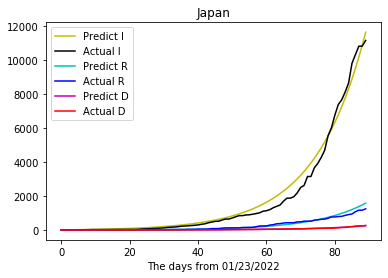

In [34]:
import matplotlib.pyplot as plt
plt.xlabel('The days from 01/23/2022')
plt.plot(range(T),Vmin[2,:].tolist()[0],'y')
plt.plot(range(T),Stai[1:91],'k')
plt.plot(range(T),Vmin[3,:].tolist()[0],'c')
plt.plot(range(T),Star[1:91],'b')
plt.plot(range(T),Vmin[4,:].tolist()[0],'m')
plt.plot(range(T),Stad[1:91],'r')
plt.legend(['Predict I', 'Actual I','Predict R', 'Actual R', 'Predict D', 'Actual D'])
plt.title('Japan')
plt.show()

In [27]:
beta,alpha,r,miu=b_,a_,r_,m_
for i in range(T,250):
    Vnew=FEuler(Vnew,beta,alpha,r,miu,N0)
    V=np.hstack((V,Vnew))

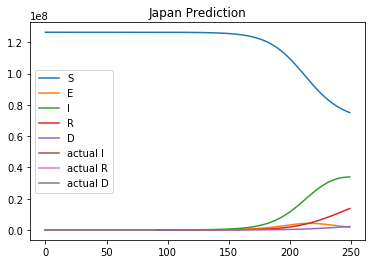

In [36]:
plt.plot(range(250),V[0,:].tolist()[0])
plt.plot(range(250),V[1,:].tolist()[0])
plt.plot(range(250),V[2,:].tolist()[0])
plt.plot(range(250),V[3,:].tolist()[0])
plt.plot(range(250),V[4,:].tolist()[0])
plt.plot(range(T),Stai[1:91])
plt.plot(range(T),Star[1:91])
plt.plot(range(T),Stad[1:91])
plt.title('Japan Prediction')
plt.legend(['S','E','I','R','D','actual I','actual R','actual D'])
plt.show()

In [29]:
StaV=Data[:,:90]
SIu=StaV
SIl=StaV
sv=np.mat([[N0-Vmin[1,89]-Data[0,90]-Data[1,90]-Data[2,90]],[Vmin[1,89]],[Data[0,90]],[Data[1,90]],[Data[2,90]]])
cov=np.mat(np.zeros((5,5)))
cov[0,0],cov[1,1]=(0.1*Vmin[1,89])**2,(0.1*Vmin[1,89])**2

In [30]:
for t in range(90,250):
    svnew=np.mat([[sv[0,0]-beta*(cov[0,1]+sv[0,0]*sv[1,0])/N0],[beta*(cov[0,1]+sv[0,0]*sv[1,0])/N0+(1-alpha)*sv[1,0]],[alpha*sv[1,0]+(1-r-miu)*sv[2,0]],[sv[3,0]+r*sv[2,0]],[sv[4,0]+miu*sv[2,0]]])
    StaV=np.hstack((StaV,svnew[2:]))
    covS_SE=sv[1,0]*cov[0,0]+sv[0,0]*cov[0,1]
    covE_SE=sv[0,0]*cov[1,1]+sv[1,0]*cov[0,1]
    covI_SE=sv[0,0]*cov[1,2]+sv[1,0]*cov[0,2]
    covR_SE=sv[0,0]*cov[1,3]+sv[1,0]*cov[0,3]
    covD_SE=sv[0,0]*cov[1,4]+sv[1,0]*cov[0,4]
    covSE_SE=sv[0,0]**2*cov[1,1]+2*cov[0,1]*sv[0,0]*sv[1,0]+sv[1,0]**2*cov[0,0]+cov[0,0]*cov[1,1]+cov[0,1]**2
    cov=np.mat([[cov[0,0]-2*beta/N0*covS_SE+beta**2/N0**2*covSE_SE, beta/N0*covS_SE+(1-alpha)*cov[0,1]-beta**2/N0**2*covSE_SE-beta*(1-alpha)/N0*covE_SE, alpha*cov[0,1]+(1-r-miu)*cov[0,2]-alpha*beta/N0*covE_SE-(1-r-miu)*beta/N0*covI_SE, cov[0,3]+r*cov[0,2]-beta/N0*covR_SE-r*beta/N0*covI_SE, cov[0,4]+miu*cov[0,2]-beta/N0*covD_SE-miu*beta/N0*covI_SE],
                [beta/N0*covS_SE+(1-alpha)*cov[0,1]-beta**2/N0**2*covSE_SE-beta*(1-alpha)/N0*covE_SE, beta**2/N0**2*covSE_SE+2*(1-alpha)*beta/N0*covE_SE+(1-alpha)**2*cov[1,1], alpha*beta/N0*covE_SE+(1-r-miu)*beta/N0*covI_SE+alpha*(1-alpha)*cov[1,1]+(1-alpha)*(1-r-miu)*cov[1,2], beta/N0*covR_SE+r*beta/N0*covI_SE+(1-alpha)*cov[1,3]+(1-alpha)*r*cov[1,2], beta/N0*covD_SE+miu*beta/N0*covI_SE+(1-alpha)*cov[1,4]+(1-alpha)*miu*cov[1,2]],
                [alpha*cov[0,1]+(1-r-miu)*cov[0,2]-alpha*beta/N0*covE_SE-(1-r-miu)*beta/N0*covI_SE, alpha*beta/N0*covE_SE+(1-r-miu)*beta/N0*covI_SE+alpha*(1-alpha)*cov[1,1]+(1-alpha)*(1-r-miu)*cov[1,2], alpha**2*cov[1,1]+2*alpha*(1-r-miu)*cov[1,2]+(1-r-miu)**2*cov[2,2], alpha*cov[1,3]+alpha*r*cov[1,2]+(1-r-miu)*cov[2,3]+r*(1-r-miu)*cov[2,2], alpha*cov[1,4]+alpha*miu*cov[1,2]+(1-r-miu)*cov[2,4]+miu*(1-r-miu)*cov[2,2]],
                [cov[0,3]+r*cov[0,2]-beta/N0*covR_SE-r*beta/N0*covI_SE, beta/N0*covR_SE+r*beta/N0*covI_SE+(1-alpha)*cov[1,3]+(1-alpha)*r*cov[1,2], alpha*cov[1,3]+alpha*r*cov[1,2]+(1-r-miu)*cov[2,3]+r*(1-r-miu)*cov[2,2], cov[3,3]+2*r*cov[2,3]+r**2*cov[2,2], cov[3,4]+miu*cov[2,3]+r*cov[2,4]+r*miu*cov[2,2]],
                [cov[0,4]+miu*cov[0,2]-beta/N0*covD_SE-miu*beta/N0*covI_SE, beta/N0*covD_SE+miu*beta/N0*covI_SE+(1-alpha)*cov[1,4]+(1-alpha)*miu*cov[1,2], alpha*cov[1,4]+alpha*miu*cov[1,2]+(1-r-miu)*cov[2,4]+miu*(1-r-miu)*cov[2,2], cov[3,4]+miu*cov[2,3]+r*cov[2,4]+r*miu*cov[2,2], cov[4,4]+2*miu*cov[2,4]+miu**2*cov[2,2]]])
    SIu=np.hstack((SIu,svnew[2:]+3*np.mat([[cov[2,2]**0.5],[cov[3,3]**0.5],[cov[4,4]**0.5]])))
    SIl=np.hstack((SIl,svnew[2:]-3*np.mat([[cov[2,2]**0.5],[cov[3,3]**0.5],[cov[4,4]**0.5]])))
    sv=svnew

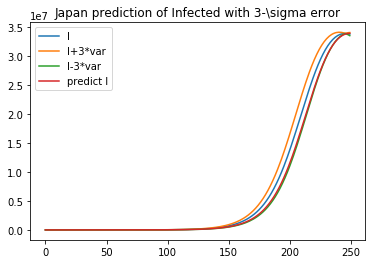

In [37]:
plt.plot(range(250),StaV[0,:].tolist()[0])
plt.plot(range(250),SIu[0,:].tolist()[0])
plt.plot(range(250),SIl[0,:].tolist()[0])
plt.plot(range(250),V[2,:].tolist()[0])
plt.legend(['I','I+3*var','I-3*var','predict I'])
plt.title('Japan prediction of Infected with 3-\sigma error')
plt.show()

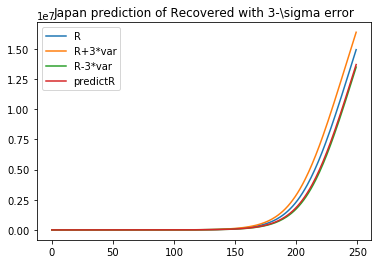

In [38]:
plt.plot(range(250),StaV[1,:].tolist()[0])
plt.plot(range(250),SIu[1,:].tolist()[0])
plt.plot(range(250),SIl[1,:].tolist()[0])
plt.plot(range(250),V[3,:].tolist()[0])
plt.legend(['R','R+3*var','R-3*var','predictR'])
plt.title('Japan prediction of Recovered with 3-\sigma error')
plt.show()

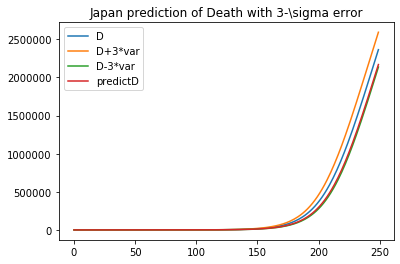

In [39]:
plt.plot(range(250),StaV[2,:].tolist()[0])
plt.plot(range(250),SIu[2,:].tolist()[0])
plt.plot(range(250),SIl[2,:].tolist()[0])
plt.plot(range(250),V[4,:].tolist()[0])
plt.legend(['D','D+3*var','D-3*var','predictD'])
plt.title('Japan prediction of Death with 3-\sigma error')
plt.show()